<a href="https://colab.research.google.com/github/roshanraii/typeofball-classifier/blob/master/notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***importing required libraries***

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***we need only few things to get our model to make predictions for us. I will give you a list and what we need is and why we will be discussed some other day.***

1. fastai library import
2. Our saved model

In [ ]:
predictor = load_learner('/content/drive/My Drive/dl_projects/typesofball')

making prediciton function

In [ ]:
def my_predictor(im):
  test_img = open_image(im)
  pred_class,pred_idx,outputs = predictor.predict(test_img)
  return pred_class

***prediction by upload image file***

In [ ]:
from google.colab import files
my_file = files.upload()

Saving 91X5ItGKGWL._AC_SL1500_.jpg to 91X5ItGKGWL._AC_SL1500_.jpg


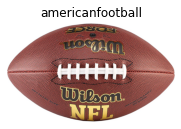

In [ ]:
path = list(my_file.keys())
c = len(path)
os.makedirs("output",exist_ok=True)

counter = 0
for i in path:
  img = open_image(i)
  title = str(my_predictor(i))
  img.show(title=title)
  plt.savefig("output/output{}.jpg".format(counter))
  counter += 1

***generating the video of the prediction output***

In [ ]:
%cd "output"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

/content/output
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libx

In [ ]:
!pip install -U kora
from kora.drive import upload_public

In [ ]:
url = upload_public('my_final_output.mp4')

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

In [ ]:
url

'https://drive.google.com/uc?id=1XNvnlyEVjLaCInTEISvlXXXzqZxlotRz'